### Introduction

Opstrat is a package for visualizing Option payoffs.

An option is a derivative, a contract that gives the buyer the right, but not the obligation, to buy or sell the underlying asset by a certain date (expiration date) at a specified price (strike price).

There are two types of options: calls and puts. Traders can construct option strategies ranging from buying or selling a single option to very complex ones that involve multiple simultaneous option positions. 

Option payoff diagrams are profit and loss charts that show the risk/reward profile of an option or combination of options. As option probability can be complex to understand, payoff diagrams gives an insight into the risk/reward for the trading strategy.

### Installing the package

The package can be installed by using pip install command.

In [ ]:
pip install opstrat

### Import opstrat
Once the package is installed successfully, it can be imported as below:

In [1]:
import opstrat as op

### Plotting single option 
The payoff diagram for a single option can be plotted using the single_plotter() function.

### Default plot:

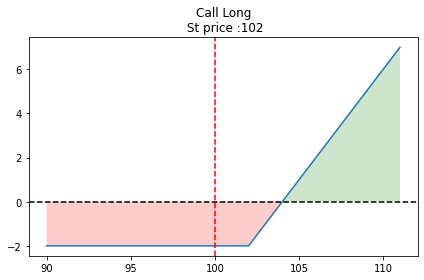

In [2]:
op.single_plotter()

If no arguments are provided, payoff diagram for a long call option will be generated with strike price as $\$$102 and spot price $\$$100.<br>
Note that the trader's profit is shown in green shade and loss is shown in red. The call option buyer's loss is limited to $\$$2 regardless of how low the share price falls. The trader's profit increases if the stock price increase beyond $\$$104 (break-even price)<br>

### Customizing single plot
The plot can be modified by providing the details of the option as arguments. <br>
Example: <br>
The following code will generate the payoff diagram for an option seller who receives option premium of $\$$12.50 selling a put option at a strike price of $\$$460 when the stock is also trading at $\$$460(spot price).

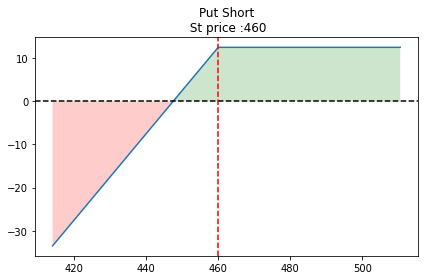

In [3]:
op.single_plotter(spot=460, strike=460, op_type='p', tr_type='s', op_pr=12.5)

### Plotting for Multiple Options strategy

The payoff diagram for a single option can be plotted using the multi_plotter() function. This function will plot each individual payoff diagrams and the resultant payoff diagram.<br>
The particulars of each option has to be provided as a list of dictionaries.<br>

Example 1: Short Strangle<br>
A short strangle is an options trading strategy that involve:<br> 
&emsp; (a)selling of a slightly out-of-the-money put and <br>
&emsp; (b)a slightly out-of-the-money call of the same underlying stock and expiration date

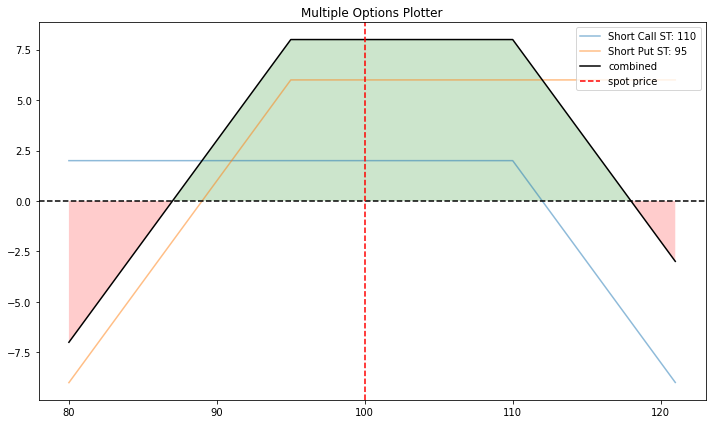

In [4]:
op_1 = {'op_type':'c','strike':110,'tr_type':'s','op_pr':2}
op_2 = {'op_type':'p','strike':95,'tr_type':'s','op_pr':6}
op.multi_plotter(spot=100, op_list=[op_1,op_2])

Example 2 : Iron Condor (Option strategy with 4 options)<br>
An iron condor is an options strategy consisting of two puts (one long and one short) and two calls (one long and one short), and four strike prices, all with the same expiration date.

The stock currently trading at $\$$ 212.26 (Spot Price)
<br>&emsp; Option 1: Sell a call with a $\$$215 strike, which gives $\$$ 7.63 in premium
<br>&emsp; Option 2: Buy a call with a strike of $\$$220, which costs $\$$ 5.35. 
<br>&emsp; Option 3: Sell a put with a strike of $\$$210 with premium received $\$$ 7.20
<br>&emsp; Option 4: Buy a put with a strike of $\$$205 costing $\$$ 5.52.

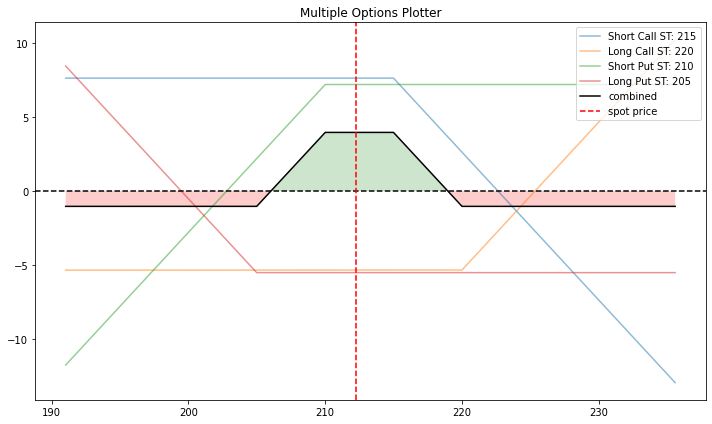

In [5]:
op1={'op_type': 'c', 'strike': 215, 'tr_type': 's', 'op_pr': 7.63}
op2={'op_type': 'c', 'strike': 220, 'tr_type': 'b', 'op_pr': 5.35}
op3={'op_type': 'p', 'strike': 210, 'tr_type': 's', 'op_pr': 7.20}
op4={'op_type': 'p', 'strike': 205, 'tr_type': 'b', 'op_pr': 5.52}

op_list=[op1, op2, op3, op4]
op.multi_plotter(spot=212.26,spot_range=10, op_list=op_list)

The optional argument, spot range limits the range of spot values covered in the plot. The default spot range in +/-20%. If the underlying asset is less volatile and the strike price of options are within a small range, smaller spot range like 5%  can be considered. For highly volatile underlying asset, higher spot range can be used.

## Plotting Real Options using Yahoo Finance API
We can plot the option-payoff by providing the option ticker and other parameters(option type, transaction type and strike price) into the yf_plotter function.

Example 1 : Call Option Buyer Payoff Diagram of Microsoft Inc.<br>
The following code will generate the payoff diagram for Microsoft Inc. call option buyer, who buys call option at strike price $\$$235. 
MSFT is the stock ticker for Microsoft Inc.

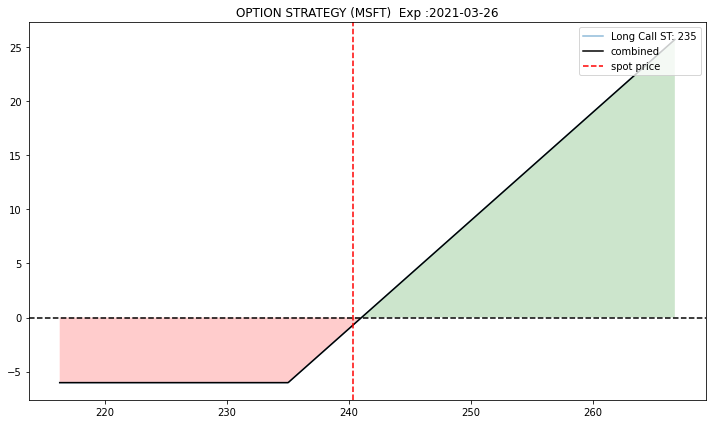

In [6]:
op_list=[{'tr_type':'b', 'op_type':'c', 'strike':235}]
op.yf_plotter('msft', spot_range=10, op_list=op_list)

Example 2: Strangle on Amazon<br>
Strangle is a strategy which involves simultaneous purchase of call option and put option near the spot price allowing the purchaser to make a profit whether the price of the stock goes up or down.
<br>&emsp;Stock ticker : AMZN(Amazon Inc.)
<br>&emsp;Amazon stock is currently trading around $\$$3070. A straddle can be constructed by purchasing the following options:
<br>&emsp;Option 1: Buy Call at Strike Price $\$$3070
<br>&emsp;Option 2: Buy Put option at Strike price $\$$3070
<br>&emsp;Option expiry date can be specified as parameter 'exp' in the format 'YYYY-MM-DD'.

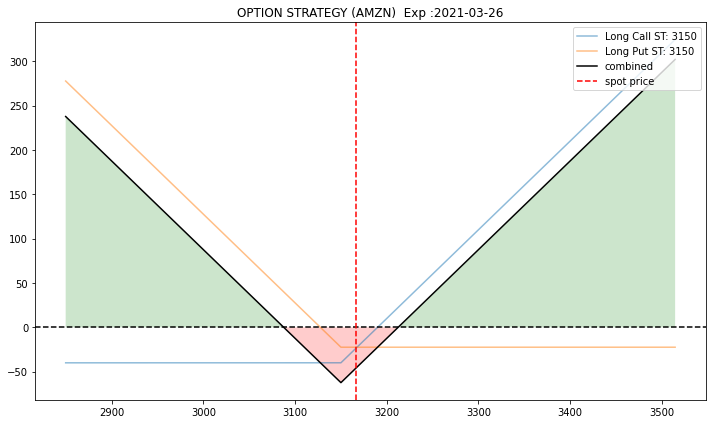

In [8]:
op_1={'op_type': 'c', 'strike':3150, 'tr_type': 'b'}
op_2={'op_type': 'p', 'strike':3150, 'tr_type': 'b'}
op.yf_plotter(ticker='amzn', 
              exp='2021-03-26', 
              op_list=[op_1, op_2])